In [63]:
#recuperer dataset wisconsin cancer
#lire aussi la notice qui donne des details sur les données
import numpy as np
import pandas as pd

df = pd.read_csv('breast.data')
df.head()

,id_number,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [64]:
#shape du dataset
df.shape

(699, 11)

In [65]:
#Verifier la présence de NaN
df.isnull().sum()

id_number                      0
Clump_Thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [66]:
#description stats sur la cible target
df['Class'].describe()
#Noter que les valeurs statistiques n'ont pas vraiment de signification

count    699.000000
mean       2.689557
std        0.951273
min        2.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        4.000000
Name: Class, dtype: float64

In [67]:
#Exploration des descripteurs
df.drop(['Class'], 1, inplace=False).describe()

,id_number,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [68]:
#nettoyer
df.replace('?', -99999, inplace=True)
#drop du id
df.drop(['id_number'], 1, inplace=True)
#former X et y
X = np.array(df.drop(['Class'],1))
print(X)
y = np.array(df['Class'])
print(y)

[[5 1 1 ..., 3 1 1]
 [5 4 4 ..., 3 2 1]
 [3 1 1 ..., 3 1 1]
 ..., 
 [5 10 10 ..., 8 10 2]
 [4 8 6 ..., 10 6 1]
 [4 8 8 ..., 10 4 1]]
[2 2 2 2 2 4 2 2 2 2 2 2 4 2 4 4 2 2 4 2 4 4 2 4 2 4 2 2 2 2 2 2 4 2 2 2 4
 2 4 4 2 4 4 4 4 2 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 2 4 2 4 4 2 2 4 2 4
 4 2 2 2 2 2 2 2 2 2 4 4 4 4 2 2 2 2 2 2 2 2 2 2 4 4 4 4 2 4 4 4 4 4 2 4 2
 4 4 4 2 2 2 4 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 2 2 2 2 2 2 2 2 2 4 2 2 2 4 2
 2 4 2 4 4 2 2 4 2 2 2 4 4 2 2 2 2 2 4 4 2 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 4
 2 4 4 4 2 4 4 2 2 2 2 2 2 2 2 4 4 2 2 2 4 4 2 2 2 4 4 2 4 4 4 2 2 4 2 2 4
 4 4 4 2 4 4 2 4 4 4 2 4 2 2 4 4 4 4 2 2 2 2 2 2 4 4 2 2 2 4 2 4 4 4 2 2 2
 2 4 4 4 4 4 2 4 4 4 2 4 2 4 4 2 2 2 2 2 4 2 2 4 4 4 4 4 2 4 4 2 2 4 4 2 4
 2 2 2 4 4 2 4 2 4 4 2 2 4 2 2 2 4 2 2 2 4 4 2 2 4 2 2 4 2 2 4 2 4 4 4 2 2
 4 4 2 4 2 2 4 4 2 2 2 4 2 2 2 4 4 2 2 2 4 2 2 4 4 4 4 4 4 2 2 2 2 4 4 2 2
 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 4 2 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2
 2 2 2 2 2 4 2 4 2 4 2 2 2 2 4 2 2 2 4 2 4

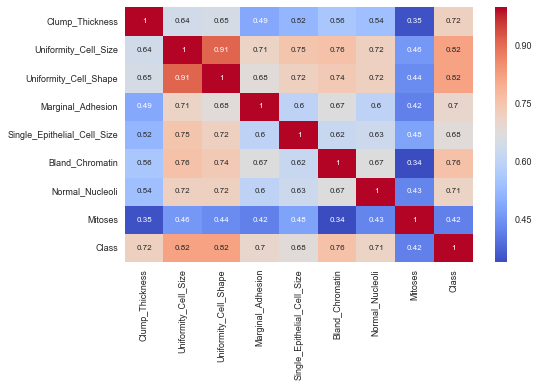

In [69]:
#Calculer la matrice de corrélation
#correlation entre les différents éléments du dataset
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", font_scale = 0.9)
sns.heatmap(data= df.corr().round(2), cmap='coolwarm', annot=True,
annot_kws={"size":8} )
plt.tight_layout()
plt.show()

In [70]:
#separer
from sklearn import preprocessing, model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state=44 )
#creer le classifier
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

#score Accuracy
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.992857142857


In [71]:
#test
data_eval = np.array([4,2,1,1,1,2,3,2,1])
data_eval = data_eval.reshape(1, -1)
prediction = clf.predict(data_eval)
print(prediction)

[2]
